# Structure:
cpg_df_{vuln, ptchd} - Two (vulnerable / patched) nested dictionaries containing CPG dictionaries each containing two dataframes of nodes and edges <br>
Example:
cpg_df_vuln["boflow1"]["nodes"] <br>
Returns dataframe containing all the nodes of the CPG representing the vulnerable version of the c program named boflow1


In [ ]:
# for running on colab and accessing files
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/SWE')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cpg_manipulation

In [ ]:
# cpg_manipulation module's imports:
# import os
import subprocess
import glob
import io
import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

In [ ]:
!apt-get update
!apt-get install -y openjdk-17-jdk

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [ ]:
!wget https://github.com/joernio/joern/releases/download/v4.0.324/joern-install.sh
!chmod +x joern-install.sh
!./joern-install.sh --interactive=false

--2025-10-16 20:02:43--  https://github.com/joernio/joern/releases/download/v4.0.324/joern-install.sh
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/175681313/ccc74d91-6eba-4097-9d47-d59859349737?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-16T20%3A59%3A55Z&rscd=attachment%3B+filename%3Djoern-install.sh&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-16T19%3A58%3A58Z&ske=2025-10-16T20%3A59%3A55Z&sks=b&skv=2018-11-09&sig=9yG4YWmUNFXfM4Nd3Ald8efHVWpQZ35xEKsaAaAhXgI%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MDY0NTI2NCwibmJmIjoxNzYwNjQ0OTY0LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG

Process each folder in provided directory where each folder represents a CPG that has been exported as nodes and edges .csv files. <br>
Combine nodes into node dataframe and edges into edge dataframe

In [ ]:
# codepath = "/content/drive/MyDrive/Colab Notebooks/SWE/input_codebase/boflow1"
# cpg_path_ptchd = "/home/a_prufrock/cpgs/ptchd/"
# cpg_df_vuln = cpg_manipulation.process_cpg_folders(codepath)
# cpg_df_ptchd = cpg_manipulation.process_cpg_folders(cpg_path_ptchd)


In [ ]:
codepath = '/content/drive/MyDrive/input_codebase/boflow1'
cpg_path = '/content/cpg4'

# joern-parse
## Generates cpg.bin from .c file
* Input: Directory path (not file path)
* Processes all .c files found in directory
* Output: Creates cpg.bin in current directory (not in the passed directory)

In [ ]:
!joern-parse {codepath}

Parsing code at: /content/drive/MyDrive/input_codebase/boflow1 - language: `NEWC`
[+] Running language frontend
Invoking CPG generator in a separate process. Note that the new process will consume additional memory.
If you are importing a large codebase (and/or running into memory issues), please try the following:
1) exit joern
2) invoke the frontend: /opt/joern/joern-cli/c2cpg.sh -J-Xmx3244m /content/drive/MyDrive/input_codebase/boflow1 --output cpg.bin
3) start joern, import the cpg: `importCpg("path/to/cpg")`

[+] Applying default overlays
Successfully wrote graph to: /content/cpg.bin
To load the graph, type `joern /content/cpg.bin`


# joern-export
## Generates .csv files of nodes and edges
* Uses previously generated cpg.bin loaded in joern as input (don't specify input path)
* Outputs .csv files for all node and edge types in a new folder specified by --out='' flag
* NOTE: Error will be thrown if specified folder already exists. Jorn must be able to create a new folder and can't overwrite an existing one.

In [ ]:
!joern-export --repr=all --format=neo4jcsv --out='/content/cpg4'
#./joern-export --repr=all --format=neo4jcsv

error: Output directory `/content/cpg4` already exists.


In [ ]:
cpg_df = cpg_manipulation.process_csv(cpg_path)

Processing /content/cpg4


## Use this to export a spreadsheet of the nodes for exploration

In [ ]:
# cpg_df['nodes'].to_csv('boflow1nodes.csv', index=False)

# Create a networkX graph and add nodes & edges

# Subgraphs (AST, CFG, PDG)


In [ ]:
boflow_AST = cpg_manipulation.build_graph(cpg_df, 'AST')
boflow_CALL = cpg_manipulation.build_graph(cpg_df, 'CALL')
boflow_CFG = cpg_manipulation.build_graph(cpg_df, 'CFG')

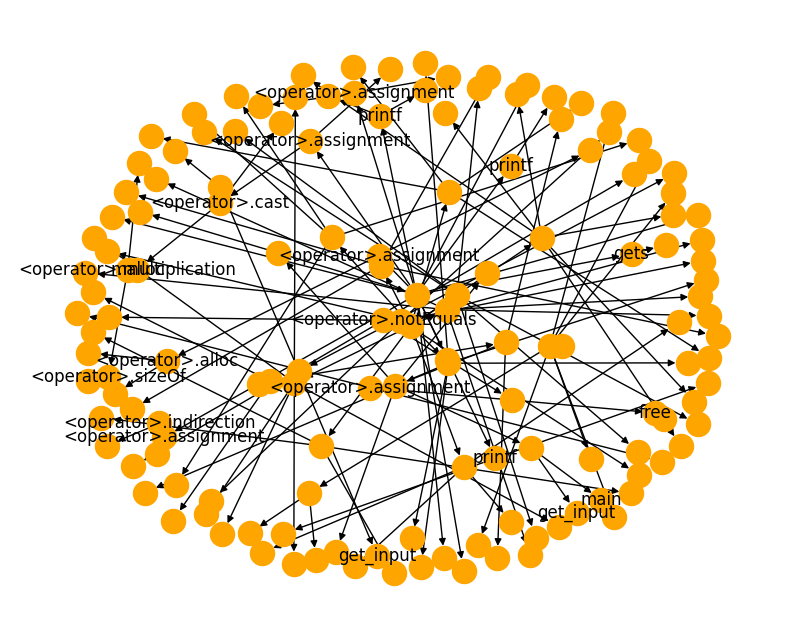

In [ ]:
cpg_manipulation.visualize_graph(boflow_AST, 'METHOD_FULL_NAME:string')

In [ ]:
# boflow_AST.nodes(data=True)

NodeDataView({25769803776: {':ID': 25769803776, ':LABEL': 'BLOCK', 'ALIAS_TYPE_FULL_NAME': nan, 'AST_PARENT_FULL_NAME:string': nan, 'AST_PARENT_TYPE:string': nan, 'CODE:string': '{\n    int number = 3000;\n    char buffer[20];\n    printf("Enter your name: ");\n    gets(buffer); // Vulnerable: no bounds checking\n    char * heapAlloc = (char *) malloc(sizeof(char) * 2);\n    *heapAlloc = number;\n    if (number != 3000) {\n        free(heapAlloc);\n        heapAlloc = NULL;\n    }\n    printf("This is my favorite number: %d", number);\n\n    printf("Hello, %s!\\\\n", buffer);\n}', 'COLUMN_NUMBER:int': 18.0, 'FILENAME:string': nan, 'FULL_NAME:string': nan, 'GENERIC_SIGNATURE:string': nan, 'INHERITS_FROM_TYPE_FULL_NAME': nan, 'IS_EXTERNAL:boolean': nan, 'LINE_NUMBER:int': 5.0, 'NAME:string': nan, 'OFFSET': nan, 'OFFSET_END': nan, 'ORDER:int': 1.0, 'COLUMN_NUMBER': nan, 'EVALUATION_STRATEGY:string': nan, 'INDEX:int': nan, 'IS_VARIADIC:boolean': nan, 'LINE_NUMBER': nan, 'TYPE_FULL_NAME:str

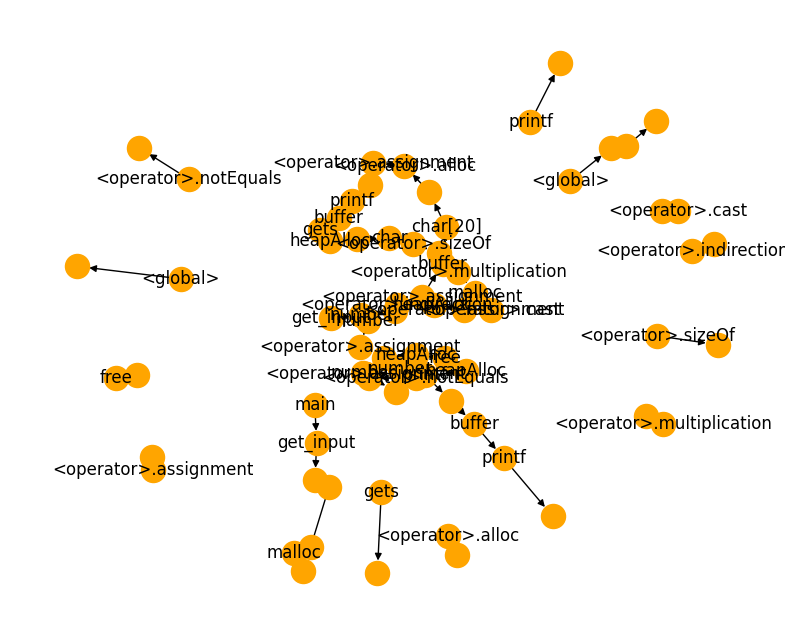

In [ ]:
cpg_manipulation.visualize_graph(boflow_CFG, 'NAME:string')

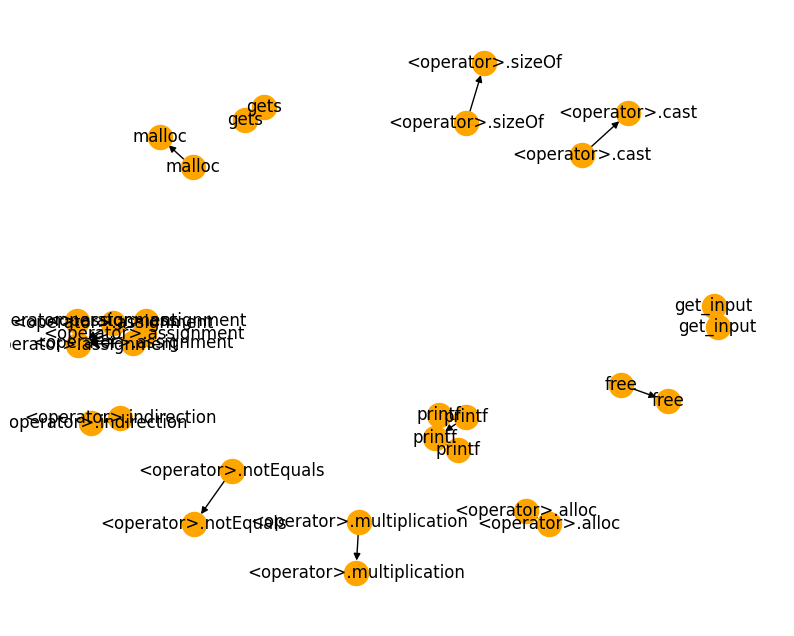

In [ ]:
cpg_manipulation.visualize_graph(boflow_CALL, 'NAME:string')

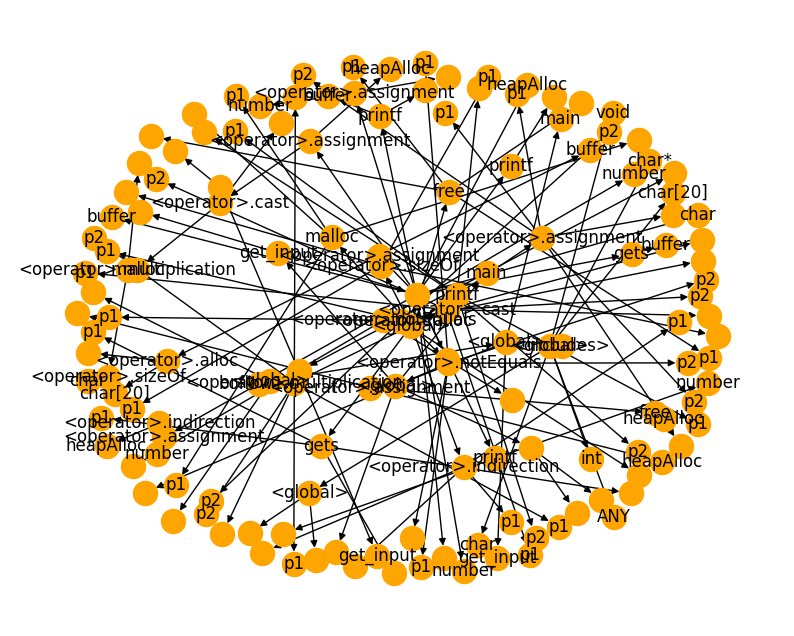

In [ ]:
cpg_manipulation.visualize_graph(boflow_AST, 'NAME:string')

In [ ]:
def augment_graph(graph, feature):
    labels = {node: data.get(feature, node) for node, data in graph.nodes(data=True)}
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, labels=labels, with_labels=True, ax=ax, node_color='orange', arrows=True)
    plt.show()